In [1]:
using Plots

Erstellung des Netze erklärung in `Erstellen des Gitters und erste Tests` Notebook

In [41]:
function Gauß(x,a)
    @. *(/(1,sqrt(2*π)*a),exp(/(-x^2,2*a^2)))
end


function phi_weight(N,a=0.6)
    x = range(-1,1,length=N)
    L = Gauß(x,a)
    L = (1 ./ L) .- 1 ./ Gauß(0,a)
    @. L[1:Int(N/2)] = -L[1:Int(N/2)]
    L = (L .- L[1]) ./ (2*L[end]) * π
end


function Numerical_Net_3(N,m,Topografie,a=0.6)
    Θ = range(0,stop=2*π,length=N*2)
    φ = phi_weight(N,a) # range(0,stop=π,length=N)
    
    X, Y, Z = [],[],[]
    
    for k in φ
        for i in Θ 
            r = range(Topografie(i,k),stop=1,length=m)
            x = @. *(r,cos(i),sin(k))
            y = @. *(r,sin(i),sin(k))
            z = @. *(r,cos(k))
            X, Y, Z = append!(X, x), append!(Y, y), append!(Z, z)
        end
    end
    [X,Y,Z]
end

Gauß (generic function with 1 method)

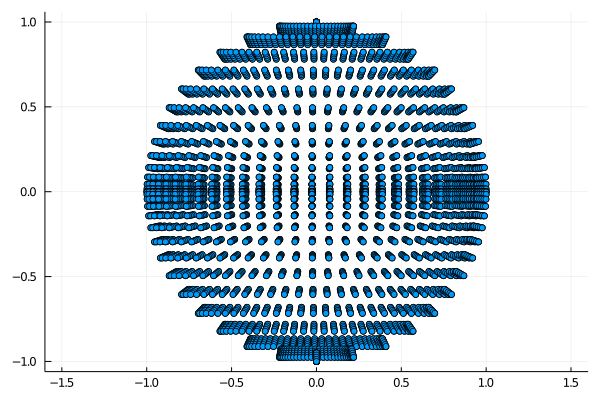

In [67]:
Topografie(i,k) = 0.95 #((k/π)+0.001)*(i/(2*π))
Net_3 = Numerical_Net_3(30,5,Topografie,2)
scatter(Net_3[1],Net_3[3],leg = false, aspect_ratio=:equal, html_output_format=:png)

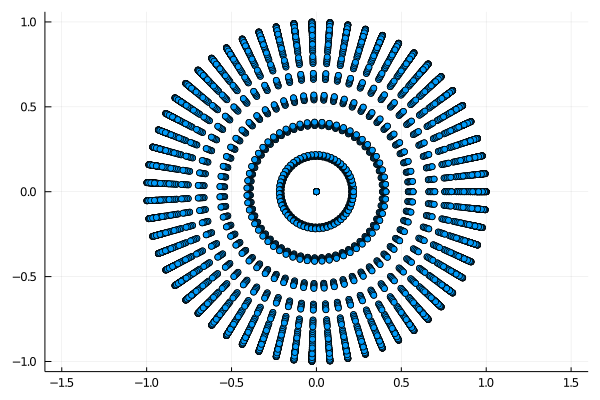

In [68]:
scatter(Net_3[1],Net_3[2],leg = false, aspect_ratio=:equal, html_output_format=:png)